In [2]:
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment, AlignInfo
from Bio import AlignIO, Phylo
from Bio import SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

## STAT6

## Alinhamento de 7 sequências homólogas

In [12]:
record = SeqIO.parse(open("STAT6_blastp.fasta"), format = 'fasta')
lista_seqs = [c.seq for c in record]
seq1 = lista_seqs[0]
seq2 = lista_seqs[1]
seq3 = lista_seqs[2]
seq4 = lista_seqs[3]
seq5 = lista_seqs[4]
seq6 = lista_seqs[5]
seq7 = lista_seqs[6]


seqr_1 = SeqRecord(seq1, id='Homo Sapiens')
seqr_2 = SeqRecord(seq2, id='Pan troglodytes')
seqr_3 = SeqRecord(seq3, id='Pongo pygmaeus')
seqr_4 = SeqRecord(seq4, id='Chlorocebus sabaeus')
seqr_5 = SeqRecord(seq5, id='Hylobates moloch')
seqr_6 = SeqRecord(seq5, id='Nomascus leucogenys')
seqr_7 = SeqRecord(seq5, id='Piliocolobus tephrosceles')

alin= MultipleSeqAlignment([seqr_1,seqr_2,seqr_3,seqr_4, seqr_5,seqr_6, seqr_7])

In [13]:
save_file = open('my_alignment_STAT6.fasta', "w")
save_file.write(format(alin, 'fasta'))
save_file.close()

In [14]:
alignment = open('my_alignment_STAT6.fasta')
alignment_records = AlignIO.parse(alignment, 'fasta')
for record in alignment_records:
    print(record)

Alignment with 7 rows and 847 columns
MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVG...PSW Homo
MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVG...PSW Pan
MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVG...PSW Pongo
MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVG...PSW Chlorocebus
MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVG...PSW Hylobates
MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVG...PSW Nomascus
MSLWGLVSKMPPEKVQRLYVDFPQHLRHLLGDWLESQPWEFLVG...PSW Piliocolobus


##  Cálculo da matriz de distâncias a partir do alinhamento utilizando a matriz “blosum62” como modelo

In [15]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(record)
print(f'Distance Matrix: \n {dm}')

Distance Matrix: 
 Homo    0.000000
Pan 0.003386    0.000000
Pongo   0.009481    0.012644    0.000000
Chlorocebus 0.013318    0.016482    0.011757    0.000000
Hylobates   0.013760    0.017144    0.016693    0.017821    0.000000
Nomascus    0.013760    0.017144    0.016693    0.017821    0.000000    0.000000
Piliocolobus    0.013760    0.017144    0.016693    0.017821    0.000000    0.000000    0.000000
    Homo    Pan Pongo   Chlorocebus Hylobates   Nomascus    Piliocolobus


##  Árvore filogenética utilizando os diferentes algoritmos
- UPGMA  
- Neighbor Joining

In [16]:
pylo_STAT6 = DistanceTreeConstructor()
upgma_tree= pylo_STAT6.upgma(dm)
print(f'UPGMA tree: \n {upgma_tree} \n #########################')

nj_tree = pylo_STAT6.nj(dm)
print(f'Neighbor Joining tree: \n {nj_tree}')

Phylo.write(upgma_tree, 'upgma_tree.nwk', 'newick')
Phylo.write(nj_tree, 'nj_tree.nwk', 'newick')

UPGMA tree: 
 Tree(rooted=True)
    Clade(branch_length=0, name='Inner6')
        Clade(name='Inner2')
            Clade(name='Inner1')
                Clade(name='Piliocolobus')
                Clade(name='Nomascus')
            Clade(name='Hylobates')
        Clade(name='Inner5')
            Clade(name='Chlorocebus')
            Clade(name='Inner4')
                Clade(name='Pongo')
                Clade(name='Inner3')
                    Clade(name='Pan')
                    Clade(name='Homo') 
 #########################
Neighbor Joining tree: 
 Tree(rooted=False)
    Clade(branch_length=0, name='Inner5')
        Clade(name='Inner4')
            Clade(name='Inner3')
                Clade(name='Inner1')
                    Clade(name='Homo')
                    Clade(name='Pan')
                Clade(name='Inner2')
                    Clade(name='Chlorocebus')
                    Clade(name='Pongo')
            Clade(name='Hylobates')
        Clade(name='Nomascus')
        Clade(na

1

## Impressão das árvores NJ e UPGMA

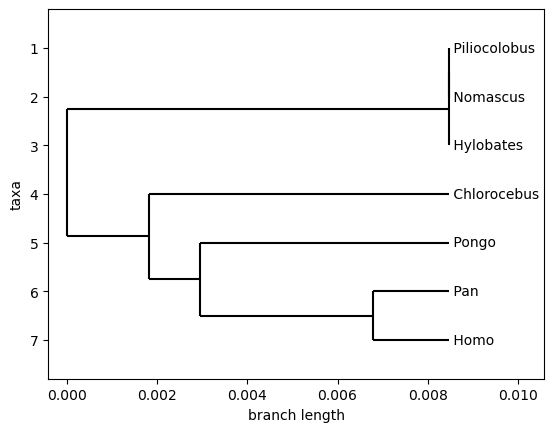

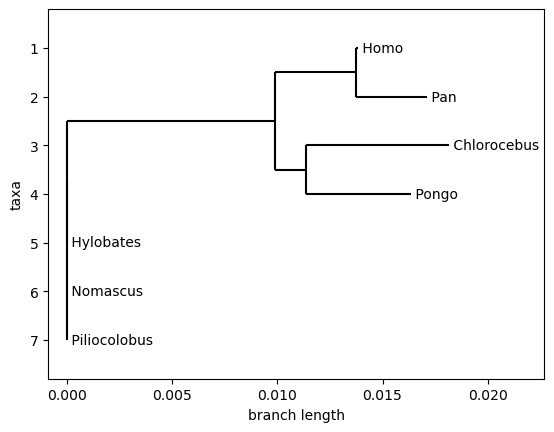

In [17]:
upgmatree = Phylo.read('upgma_tree.nwk','newick')
njtree = Phylo.read('nj_tree.nwk','newick')

for clade in upgmatree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
for clade in njtree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
        
Phylo.draw(upgmatree)
Phylo.draw(njtree)

## IL13

In [6]:
record2 = SeqIO.parse(open("IL13_blastp.fasta"), format = 'fasta')
lista_seqs = [c.seq for c in record2]
seq1 = lista_seqs[0]
seq2 = lista_seqs[1]
seq3 = lista_seqs[2]
seq4 = lista_seqs[3]
seq5 = lista_seqs[4]
seq6 = lista_seqs[5]
seq7 = lista_seqs[6]


seqr_1 = SeqRecord(seq1, id='Homo Sapiens')
seqr_2 = SeqRecord(seq2, id='Pan troglodytes')
seqr_3 = SeqRecord(seq3, id='Pongo abelii')
seqr_4 = SeqRecord(seq4, id='Nomascus leucogenys')
seqr_5 = SeqRecord(seq5, id='Theropithecus gelada')
seqr_6 = SeqRecord(seq5, id='Rhinopithecus roxellana')
seqr_7 = SeqRecord(seq5, id='Oryxdammah')

alin= MultipleSeqAlignment([seqr_1,seqr_2,seqr_3,seqr_4, seqr_5,seqr_6, seqr_7])

In [7]:
save_file = open('my_alignment_IL13.fasta', "w")
save_file.write(format(alin, 'fasta'))
save_file.close()

In [8]:
alignment = open('my_alignment_IL13.fasta')
alignment_records = AlignIO.parse(alignment, 'fasta')
for record in alignment_records:
    print(record)

Alignment with 7 rows and 146 columns
MHPLLNPLLLALGLMALLLTTVIALTCLGGFASPGPVPPSTALR...QFN Homo
MRPLLNPLLLALGLMALLLTTVIALTCLGGFASPGPVPPSTALR...RFN Pan
MRPLLNPLLLALGLMALLLTTVIALTCLGGFASPGPVPPSTALR...RFN Pongo
MHPLLNPLLLALGLMALLLTTVIALTCLGGFASPGPVPPSTALR...RFN Nomascus
MRPLLNPLLLALGLMALLLTMVIALTCLGGFASPSPVPPSTALR...QFN Theropithecus
MRPLLNPLLLALGLMALLLTMVIALTCLGGFASPSPVPPSTALR...QFN Rhinopithecus
MRPLLNPLLLALGLMALLLTMVIALTCLGGFASPSPVPPSTALR...QFN Oryxdammah


In [9]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(record)
print(f'Distance Matrix: \n {dm}')

Distance Matrix: 
 Homo    0.000000
Pan 0.021448    0.000000
Pongo   0.022788    0.001348    0.000000
Nomascus    0.037534    0.036290    0.037634    0.000000
Theropithecus   0.046917    0.036388    0.037736    0.072581    0.000000
Rhinopithecus   0.046917    0.036388    0.037736    0.072581    0.000000    0.000000
Oryxdammah  0.046917    0.036388    0.037736    0.072581    0.000000    0.000000    0.000000
    Homo    Pan Pongo   Nomascus    Theropithecus   Rhinopithecus   Oryxdammah


In [10]:
pylo_IL13= DistanceTreeConstructor()
upgma_tree= pylo_IL13.upgma(dm)
print(f'UPGMA tree: \n {upgma_tree} \n #########################')

nj_tree = pylo_IL13.nj(dm)
print(f'Neighbor Joining tree: \n {nj_tree}')

Phylo.write(upgma_tree, 'upgma_tree.nwk', 'newick')
Phylo.write(nj_tree, 'nj_tree.nwk', 'newick')

UPGMA tree: 
 Tree(rooted=True)
    Clade(branch_length=0, name='Inner6')
        Clade(name='Inner2')
            Clade(name='Inner1')
                Clade(name='Oryxdammah')
                Clade(name='Rhinopithecus')
            Clade(name='Theropithecus')
        Clade(name='Inner5')
            Clade(name='Nomascus')
            Clade(name='Inner4')
                Clade(name='Inner3')
                    Clade(name='Pongo')
                    Clade(name='Pan')
                Clade(name='Homo') 
 #########################
Neighbor Joining tree: 
 Tree(rooted=False)
    Clade(branch_length=0, name='Inner5')
        Clade(name='Inner3')
            Clade(name='Nomascus')
            Clade(name='Homo')
        Clade(name='Inner4')
            Clade(name='Pongo')
            Clade(name='Pan')
        Clade(name='Inner2')
            Clade(name='Oryxdammah')
            Clade(name='Inner1')
                Clade(name='Rhinopithecus')
                Clade(name='Theropithecus')


1

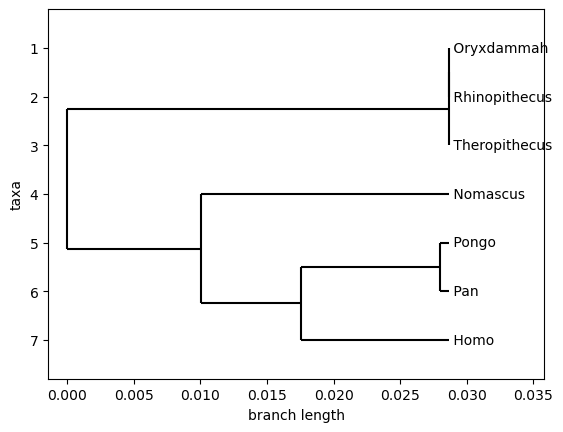

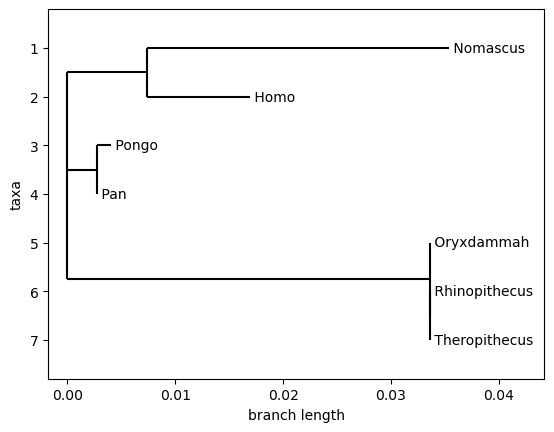

In [11]:
upgmatree = Phylo.read('upgma_tree.nwk','newick')
njtree = Phylo.read('nj_tree.nwk','newick')

for clade in upgmatree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
for clade in njtree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
        
Phylo.draw(upgmatree)
Phylo.draw(njtree)

## IL10

In [18]:
record3 = SeqIO.parse(open("IL10_blastp.fasta"), format = 'fasta')
lista_seqs = [c.seq for c in record3]
seq1 = lista_seqs[0]
seq2 = lista_seqs[1]
seq3 = lista_seqs[2]
seq4 = lista_seqs[3]
seq5 = lista_seqs[4]
seq6 = lista_seqs[5]
seq7 = lista_seqs[6]


seqr_1 = SeqRecord(seq1, id='Homo Sapiens')
seqr_2 = SeqRecord(seq2, id='Pan troglodytes')
seqr_3 = SeqRecord(seq3, id='Gorilla gorilla gorilla')
seqr_4 = SeqRecord(seq4, id='Nomascus leucogenys')
seqr_5 = SeqRecord(seq5, id='Aotus nancymaae')
seqr_6 = SeqRecord(seq5, id='Sapajus apella')
seqr_7 = SeqRecord(seq5, id='Papio anubis')

alin= MultipleSeqAlignment([seqr_1,seqr_2,seqr_3,seqr_4, seqr_5,seqr_6, seqr_7])

In [19]:
save_file = open('my_alignment_IL10.fasta', "w")
save_file.write(format(alin, 'fasta'))
save_file.close()

In [21]:
alignment = open('my_alignment_IL10.fasta')
alignment_records = AlignIO.parse(alignment, 'fasta')
for record in alignment_records:
    print(record)

Alignment with 7 rows and 178 columns
MHSSALLCCLVLLTGVRASPGQGTQSENSCTHFPGNLPNMLRDL...IRN Homo
MHSSALLCCLVLLTGVRASPGQGTQSENSCTHFPGNLPNMLRDL...IRN Pan
MHSSALLCCLVLLTGVRASPGHGTQSENSCTHFPGNLPNMLRDL...IRN Gorilla
MHSSALLCCLVLLTGVRASPGQATQSENSCTHFPGSLPNMLREL...IQN Nomascus
MHSSALLCCLVFLTGVRASPGQGTQSENSCTHFPGNLPHMLREL...TQN Aotus
MHSSALLCCLVFLTGVRASPGQGTQSENSCTHFPGNLPHMLREL...TQN Sapajus
MHSSALLCCLVFLTGVRASPGQGTQSENSCTHFPGNLPHMLREL...TQN Papio


In [22]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(record)
print(f'Distance Matrix: \n {dm}')

Distance Matrix: 
 Homo    0.000000
Pan 0.004315    0.000000
Gorilla 0.009677    0.013978    0.000000
Nomascus    0.039914    0.040992    0.049462    0.000000
Aotus   0.095905    0.096983    0.104301    0.090517    0.000000
Sapajus 0.095905    0.096983    0.104301    0.090517    0.000000    0.000000
Papio   0.095905    0.096983    0.104301    0.090517    0.000000    0.000000    0.000000
    Homo    Pan Gorilla Nomascus    Aotus   Sapajus Papio


In [23]:
pylo_IL10= DistanceTreeConstructor()
upgma_tree= pylo_IL10.upgma(dm)
print(f'UPGMA tree: \n {upgma_tree} \n #########################')

nj_tree = pylo_IL10.nj(dm)
print(f'Neighbor Joining tree: \n {nj_tree}')

Phylo.write(upgma_tree, 'upgma_tree.nwk', 'newick')
Phylo.write(nj_tree, 'nj_tree.nwk', 'newick')

UPGMA tree: 
 Tree(rooted=True)
    Clade(branch_length=0, name='Inner6')
        Clade(name='Inner2')
            Clade(name='Inner1')
                Clade(name='Papio')
                Clade(name='Sapajus')
            Clade(name='Aotus')
        Clade(name='Inner5')
            Clade(name='Nomascus')
            Clade(name='Inner4')
                Clade(name='Gorilla')
                Clade(name='Inner3')
                    Clade(name='Pan')
                    Clade(name='Homo') 
 #########################
Neighbor Joining tree: 
 Tree(rooted=False)
    Clade(branch_length=0, name='Inner5')
        Clade(name='Inner4')
            Clade(name='Gorilla')
            Clade(name='Homo')
        Clade(name='Pan')
        Clade(name='Inner3')
            Clade(name='Inner2')
                Clade(name='Papio')
                Clade(name='Inner1')
                    Clade(name='Sapajus')
                    Clade(name='Aotus')
            Clade(name='Nomascus')


1

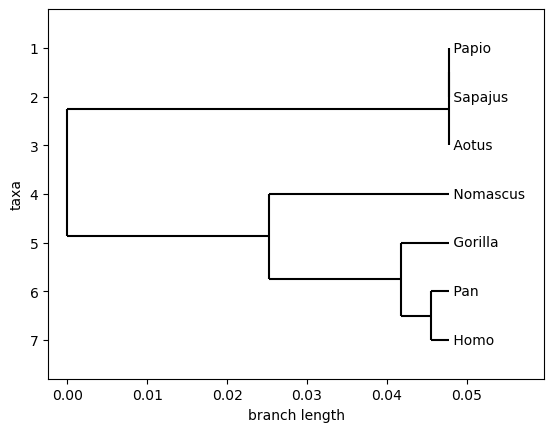

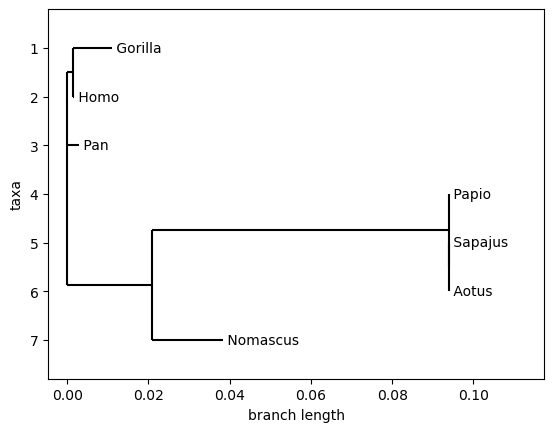

In [24]:
upgmatree = Phylo.read('upgma_tree.nwk','newick')
njtree = Phylo.read('nj_tree.nwk','newick')

for clade in upgmatree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
for clade in njtree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
        
Phylo.draw(upgmatree)
Phylo.draw(njtree)

## TGFB1

In [25]:
record4 = SeqIO.parse(open("TGFB1_blastp.fasta"), format = 'fasta')
lista_seqs = [c.seq for c in record4]
seq1 = lista_seqs[0]
seq2 = lista_seqs[1]
seq3 = lista_seqs[2]
seq4 = lista_seqs[3]
seq5 = lista_seqs[4]
seq6 = lista_seqs[5]
seq7 = lista_seqs[6]


seqr_1 = SeqRecord(seq1, id='Homo Sapiens')
seqr_2 = SeqRecord(seq2, id='Papio anubis')
seqr_3 = SeqRecord(seq3, id='Rhinopithecus roxellana')
seqr_4 = SeqRecord(seq4, id='Pongo pygmaeus')
seqr_5 = SeqRecord(seq5, id='Nomascus leucogenys')
seqr_6 = SeqRecord(seq5, id='Symphalangus syndactylus')
seqr_7 = SeqRecord(seq5, id='Sapajus apella')

alin= MultipleSeqAlignment([seqr_1,seqr_2,seqr_3,seqr_4, seqr_5,seqr_6, seqr_7])

In [26]:
save_file = open('my_alignment_TGFB1.fasta', "w")
save_file.write(format(alin, 'fasta'))
save_file.close()

In [27]:
alignment = open('my_alignment_TGFB1.fasta')
alignment_records = AlignIO.parse(alignment, 'fasta')
for record in alignment_records:
    print(record)

Alignment with 7 rows and 390 columns
MPPSGLRLLPLLLPLLWLLVLTPGRPAAGLSTCKTIDMELVKRK...KCS Homo
MPPSGLRLLPLLLPLLWLLVLTPGRPAAGLSTCKTIDMELVKRK...KCS Papio
MPPSGLRLLPLLLPLLWLLVLTPGRPAAGLSTCKTIDMELVKRK...KCS Rhinopithecus
MPPSRLRLLPLLLPLLWLLVLTPGRPAAGLSTCKTIDMELVKRK...KCS Pongo
MPPSGLRLLPLLLPLLWLLVLTLGRPAAGLSTCKTIDMELVKRK...KCS Nomascus
MPPSGLRLLPLLLPLLWLLVLTLGRPAAGLSTCKTIDMELVKRK...KCS Symphalangus
MPPSGLRLLPLLLPLLWLLVLTLGRPAAGLSTCKTIDMELVKRK...KCS Sapajus


In [28]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(record)
print(f'Distance Matrix: \n {dm}')

Distance Matrix: 
 Homo    0.000000
Papio   0.001444    0.000000
Rhinopithecus   0.003370    0.001926    0.000000
Pongo   0.005296    0.003852    0.005778    0.000000
Nomascus    0.008666    0.007222    0.009148    0.011074    0.000000
Symphalangus    0.008666    0.007222    0.009148    0.011074    0.000000    0.000000
Sapajus 0.008666    0.007222    0.009148    0.011074    0.000000    0.000000    0.000000
    Homo    Papio   Rhinopithecus   Pongo   Nomascus    Symphalangus    Sapajus


In [30]:
pylo_TGFB1= DistanceTreeConstructor()
upgma_tree= pylo_TGFB1.upgma(dm)
print(f'UPGMA tree: \n {upgma_tree} \n #########################')

nj_tree = pylo_TGFB1.nj(dm)
print(f'Neighbor Joining tree: \n {nj_tree}')

Phylo.write(upgma_tree, 'upgma_tree.nwk', 'newick')
Phylo.write(nj_tree, 'nj_tree.nwk', 'newick')

UPGMA tree: 
 Tree(rooted=True)
    Clade(branch_length=0, name='Inner6')
        Clade(name='Inner2')
            Clade(name='Inner1')
                Clade(name='Sapajus')
                Clade(name='Symphalangus')
            Clade(name='Nomascus')
        Clade(name='Inner5')
            Clade(name='Pongo')
            Clade(name='Inner4')
                Clade(name='Rhinopithecus')
                Clade(name='Inner3')
                    Clade(name='Papio')
                    Clade(name='Homo') 
 #########################
Neighbor Joining tree: 
 Tree(rooted=False)
    Clade(branch_length=0, name='Inner5')
        Clade(name='Inner4')
            Clade(name='Inner3')
                Clade(name='Homo')
                Clade(name='Papio')
            Clade(name='Rhinopithecus')
        Clade(name='Pongo')
        Clade(name='Inner2')
            Clade(name='Sapajus')
            Clade(name='Inner1')
                Clade(name='Symphalangus')
                Clade(name='Nomascus')


1

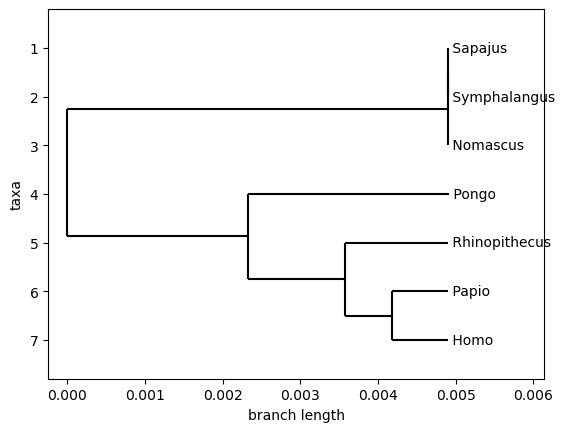

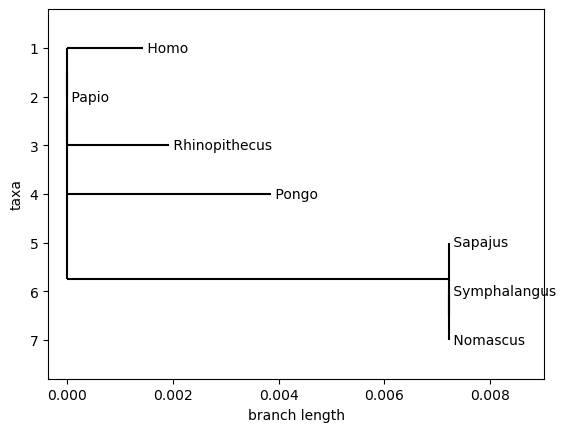

In [31]:
upgmatree = Phylo.read('upgma_tree.nwk','newick')
njtree = Phylo.read('nj_tree.nwk','newick')

for clade in upgmatree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
for clade in njtree.find_clades():
    if 'Inner' in clade.name:
        clade.name = ""
        
Phylo.draw(upgmatree)
Phylo.draw(njtree)